<a href="https://colab.research.google.com/github/thoriqakhdn/UnsupervisedLearning/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


numpy digunakan untuk melakukan beragam kalkulasi mathematical dan scientific, dan juga memiliki fungsi untuk mengerjakan linear algebra, fourier transform, dan matrices

matplotlib digunakan untuk membuat plot

panda digunakan untuk menganalisis data

In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Data Exploration

In [ ]:
data = pd.read_csv('https://github.com/thoriqakhdn/UnsupervisedLearning/blob/main/audit_risk.csv?raw=true')
data

In [ ]:
data.info()

In [466]:
data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


Preprocessing Data

In [467]:
data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [468]:
data = data.drop(['Money_Value'], axis=1)

In [469]:
data = data.drop(['LOCATION_ID','District_Loss','History'], axis=1)

Split Dataset into X dan Y dengan x merupakan independent value dan y merupakan dependent value

In [470]:
x = pd.DataFrame(data.iloc[:, :22])
y = data[['Risk']]

x

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Risk_D,PROB,RiSk_E,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,0.676,0.2,0.4,0.2,0.0,2.4,8.574,0.4,0.5,1.7148
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0.188,0.2,0.4,0.2,0.0,2.0,2.554,0.4,0.5,0.5108
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,0.000,0.2,0.4,0.2,0.0,2.0,1.548,0.4,0.5,0.3096
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,...,7.050,0.2,0.4,0.2,0.0,4.4,17.530,0.4,0.5,3.5060
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,0.000,0.2,0.4,0.2,0.0,2.0,1.416,0.4,0.5,0.2832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,0.2,...,0.000,0.2,0.4,0.2,0.0,2.0,1.578,0.4,0.5,0.3156
772,55.57,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,0.2,...,0.000,0.2,0.4,0.2,0.0,2.0,1.568,0.4,0.5,0.3136
773,55.57,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,0.2,...,0.000,0.2,0.4,0.2,0.0,2.0,1.456,0.4,0.5,0.2912
774,55.57,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,0.2,...,0.000,0.2,0.4,0.2,0.0,2.0,1.440,0.4,0.5,0.2880


In [471]:
x.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Risk_D,PROB,RiSk_E,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,0.676,0.2,0.4,0.2,0.0,2.4,8.574,0.4,0.5,1.7148
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0.188,0.2,0.4,0.2,0.0,2.0,2.554,0.4,0.5,0.5108
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,0.000,0.2,0.4,0.2,0.0,2.0,1.548,0.4,0.5,0.3096
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,...,7.050,0.2,0.4,0.2,0.0,4.4,17.530,0.4,0.5,3.5060
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,0.000,0.2,0.4,0.2,0.0,2.0,1.416,0.4,0.5,0.2832


Encode Categorical Data
menggunakan One Hot Encoding dimana akan mengconvert int ke binary vector stream

In [472]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
y = onehotencoder.fit_transform(y).toarray()
y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Memisah dataset X dan Y menjadi Training set dan Test set X_train, X_test, y-train, and y_test. 

In [473]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Feature Scaling
untuk menormalisasi data dengan range tertentu sehingga waktu kalkulasi tidak lama seperti normalisasi yg dilakukan sebelumnya

In [474]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train[0,:]

array([-0.74574327, -0.30671327, -0.89168181, -0.34709746, -0.40244805,
       -0.69495364, -0.40792144, -0.4307902 , -0.25516311, -0.2983169 ,
       -0.28699721, -0.57282087, -0.21607839, -0.16887054, -0.42284595,
       -0.24043317, -0.16301936, -0.84230803, -0.33732868, -0.38548548,
        0.        , -0.30718557])

Membuat Artifical Neural Network

In [523]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Initiasi ANN

In [537]:
classifier = Sequential()

Menambahkan input layer dan hidden layer

In [538]:
classifier.add(Dense(6, activation = 'relu', input_dim =22))
classifier.add(Dense(6, activation = 'relu'))
classifier.add(Dense(6, activation = 'relu'))
classifier.add(Dense(2, activation = 'sigmoid'))

classifier.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, 6)                 138       
                                                                 
 dense_137 (Dense)           (None, 6)                 42        
                                                                 
 dense_138 (Dense)           (None, 6)                 42        
                                                                 
 dense_139 (Dense)           (None, 2)                 14        
                                                                 
Total params: 236
Trainable params: 236
Non-trainable params: 0
_________________________________________________________________


Train ANN
Compile ANN menggunakan “adam’ adalah optimizer yang dapat melakukan sstochastic gradient descent,optimizer ini meemperbarui beban dan mengurangi loss

In [539]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [540]:
history = classifier.fit(X_train, y_train,validation_data = (X_test,y_test), batch_size = 32, epochs = 50)

Epoch 1/50
20/20 [==============================] - 1s 12ms/step - loss: 0.7010 - accuracy: 0.4032 - val_loss: 0.6929 - val_accuracy: 0.3526
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6644 - accuracy: 0.5323 - val_loss: 0.6610 - val_accuracy: 0.6154
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6328 - accuracy: 0.6532 - val_loss: 0.6303 - val_accuracy: 0.6346
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6009 - accuracy: 0.7790 - val_loss: 0.6000 - val_accuracy: 0.8077
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5696 - accuracy: 0.8403 - val_loss: 0.5701 - val_accuracy: 0.8526
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5387 - accuracy: 0.8952 - val_loss: 0.5404 - val_accuracy: 0.9167
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5113 - accuracy: 0.9177 - val_loss: 0.5142 - val_accuracy: 0.9551
Epoch 8/50
20/20 [=

Prediksi dan Evaluasi

In [541]:
prediction = classifier.predict(X_test)
print(prediction[10])

5/5 [==============================] - 0s 4ms/step
[2.4877529e-04 9.9997395e-01]


In [542]:
pred = []
test = []

for i in range(len(prediction)):
  pred.append(np.argmax(prediction[i]))

for i in range(len(y_test)):
  test.append(np.argmax(y_test[i]))

print(pred)
print(test)

[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]
[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]


In [543]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test, pred)
print(cm)
accuracy_score(test,pred)


[[101   0]
 [  2  53]]


0.9871794871794872

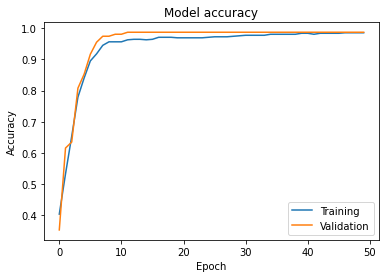

In [544]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'])
plt.show()